In [1]:
%%javascript
document.title="numerics"

<IPython.core.display.Javascript object>

In [2]:
import os
from collections import namedtuple
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
matplotlib.rcParams['text.usetex'] = True
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
sns.set(rc={'figure.figsize':(10,7)})

In [4]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})

def load_sln(path, file_names, version):
    sln = Sln._make([pd.read_csv(os.path.join(path, '{0}_{1}.csv'.format(file, version)), 
                     header=None) for file in file_names])
    return sln 

def plot_psi(psi):
    x = np.arange(len(psi))*360/J
    ax = sns.lineplot(data=psi.set_axis(x))
    ax.set_xlabel('α')
    ax.set_ylabel('$\psi$')
    return ax

In [12]:
path = '/Users/kevinliu/temp/NumericsData/'
data_files = ['psi','pressure','h','theta_A', 'vel_u','vel_v']
version = 1
Sln = namedtuple("Sln", data_files)

sln = load_sln(path, data_files, version)

I, J = sln.psi.shape
dr = 1/I
da = (2*np.pi)/J
dt = 0.1

In [13]:
t = np.arange(0,len(sln.theta_A))*dt

theta_As = pd.DataFrame(sln.theta_A)
hs = pd.DataFrame(sln.h)



In [9]:
theta_As

,0,2,3,4
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,-0.000003,-0.000003,-0.000003,-0.000003
3,-0.000010,-0.000010,-0.000010,-0.000010
4,-0.000020,-0.000020,-0.000020,-0.000020
...,...,...,...,...
76,-0.146766,-0.146766,-0.146766,-0.146766
77,-0.160023,-0.160023,-0.160023,-0.160023
78,-0.174474,-0.174474,-0.174474,-0.174474
79,-0.190226,-0.190226,-0.190226,-0.190226


In [15]:
for version in range(2,5):
    sln = load_sln(path, data_files, version)
    theta_As[version] = sln.theta_A
    hs[version] = sln.h
    

In [19]:
theta_As = theta_As.set_axis(t)
hs = hs.set_axis(t)

Text(0.5, 1.0, 'Plots of theta_1')

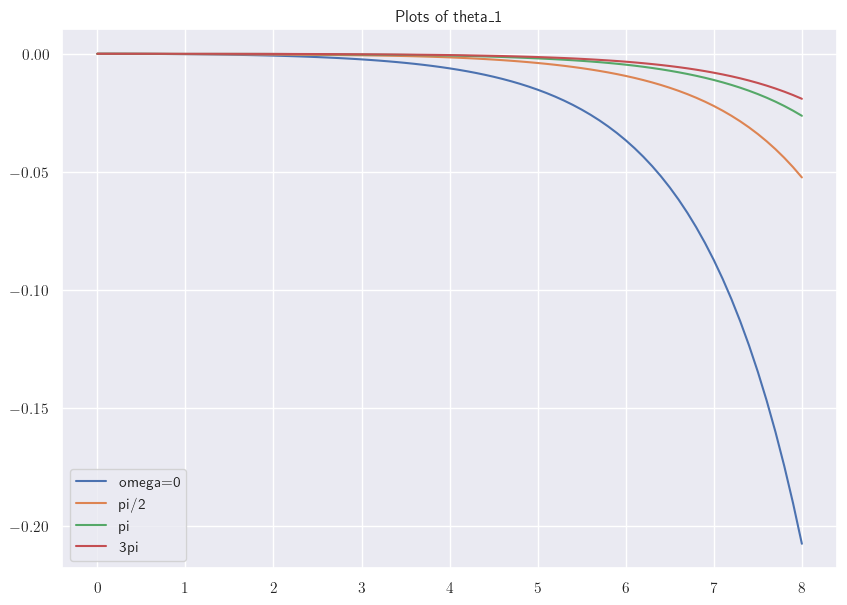

In [20]:
ax = theta_As.plot()
ax.legend(['omega=0','pi/2','pi','3pi'])
ax.set_title('Plots of theta_1')

Text(0.5, 1.0, 'Plot of h')

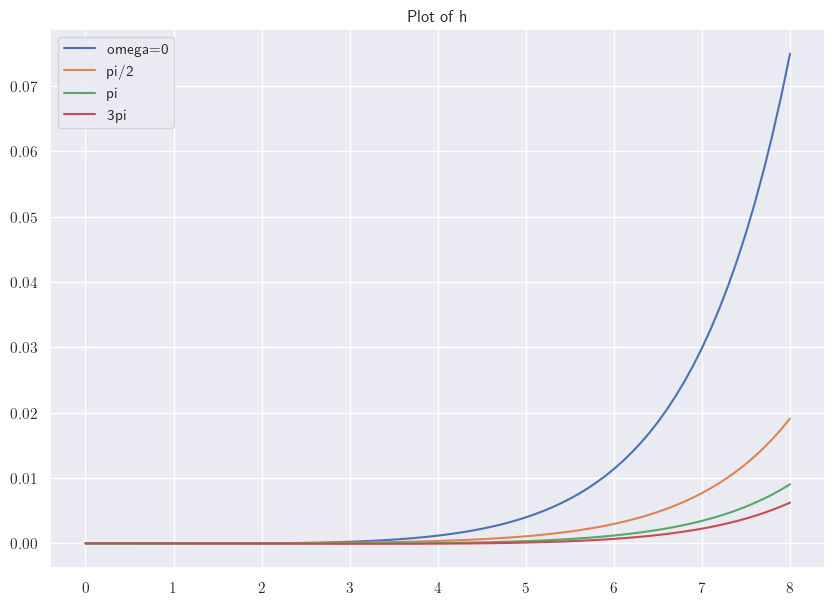

In [21]:
ax = hs.plot()
ax.legend(['omega=0','pi/2','pi','3pi'])
ax.set_title('Plot of h')

### force by different q

In [7]:
h_force = [0.00181898,0.00706608,0.0151914,0.0254859,0.037272,0.05,0.0632721,0.0767924,0.0903585,
          0.103822,0.165782,0.214953,0.251277,0.277562,0.296616,0.310604,0.321052,0.329018,0.3352,0.340062,0.343947,0.347126,0.349699,0.351808,0.353626,0.355166,0.356463,0.357542,]
torque = [0.00125774,0.00474716,0.00973879,0.0153425,0.0207914,0.0255823,0.0294747,0.0324183,0.0344735,
         0.0357452,0.0348378,0.029244,0.0235527,0.0188324,0.015141,0.0122869,0.0100767,0.00834278,0.00695977,0.00585147,0.00494964,0.00419458,0.00358607,0.00308648,0.00263895,0.00225198,0.00193692,0.00167442,]
q =  np.concatenate((np.arange(0.1,1,0.1), np.arange(1,10.5,0.5)))
q_data = pd.DataFrame({'q':q, 'lift':h_force, 'torque':torque})
q_data.set_index('q',inplace=True)

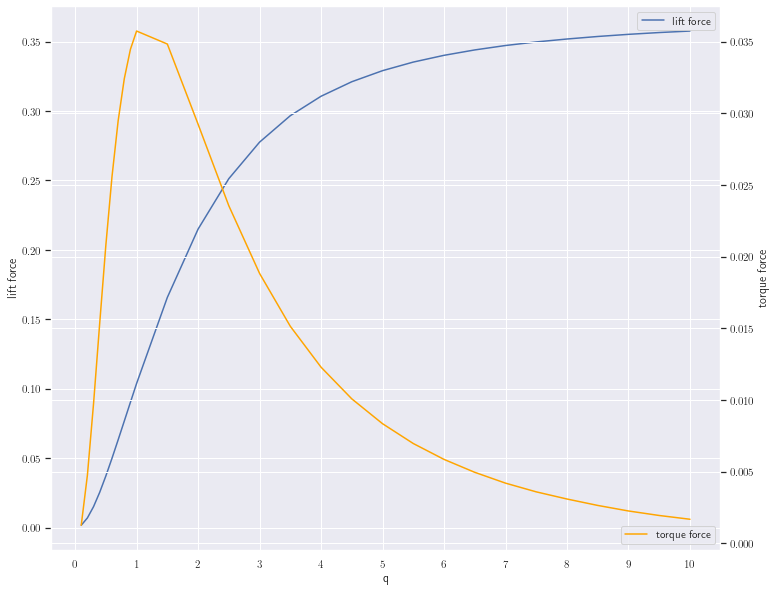

In [17]:
ax=q_data['lift'].plot()
ax.legend([r'lift force'], loc='upper right')
ax.set_ylabel('lift force')

ax2 = ax.twinx()
q_data['torque'].plot(ax=ax2, color='orange')
ax2.legend([r'torque force'], loc='lower right')
ax2.set_ylabel('torque force')
plt.xticks(np.arange(0, 11, 1))
plt.savefig('q_plots.pdf',bbox_inches='tight')

In [23]:
np.max(sln.theta_A)

0    1.173659
t    6.000000
dtype: float64

In [8]:
np.sum(sln.pressure.apply(lambda x: len([ i for i in x if i < 0]),axis=0)) / (200*100)

0.12865

In [10]:
np.max( sln.pressure.apply(lambda x: np.max(x)))

0.0024702136870473623

In [11]:
np.min( sln.pressure.apply(lambda x: np.min(x)))

-0.005372202023863792

In [13]:
np.sum(sln.pressure.apply(lambda x: len([ i for i in x if i < 0]), axis=0)) / (200*100)

0.00725

In [14]:
np.max( sln.pressure.apply(lambda x: np.max(x)))

0.2792571187019348

In [15]:
np.min( sln.pressure.apply(lambda x: np.min(x)))

-0.017956404015421867

0.12865

In [54]:
154 / (200*100)

0.0077

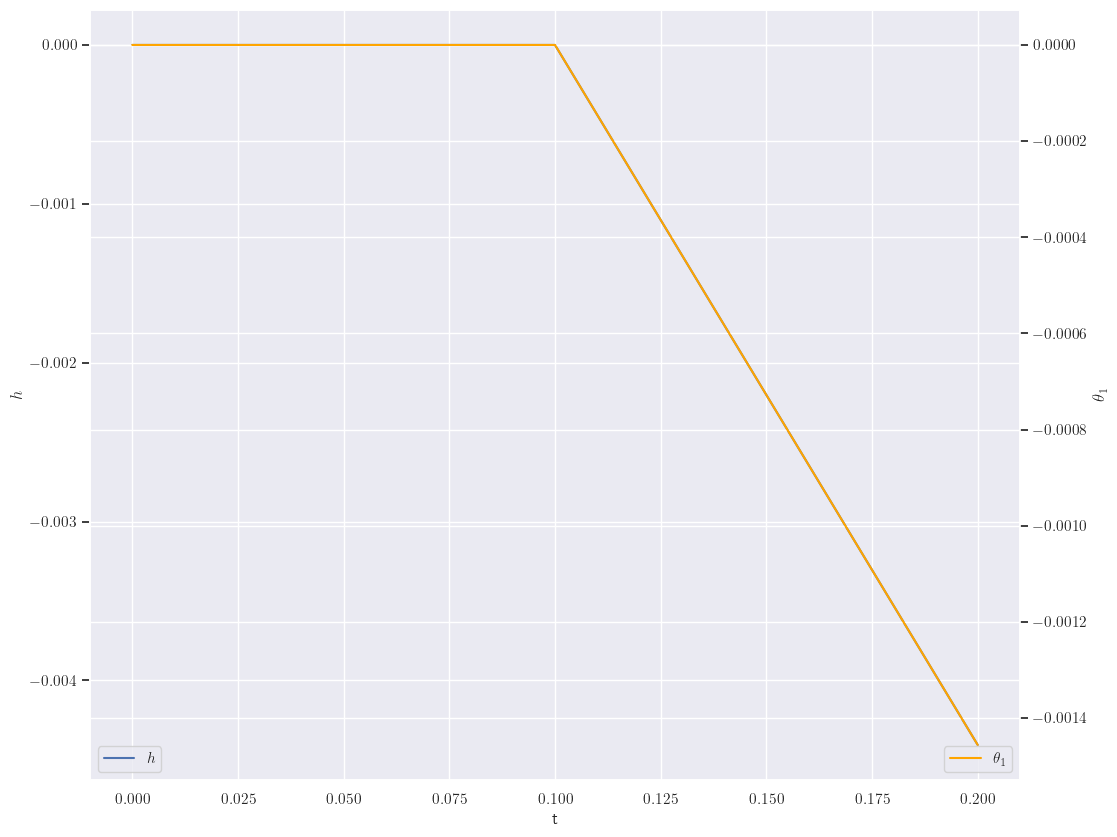

In [6]:
dt = 0.1

sln.h['t'] = sln.h.index*dt
ax = sln.h[:100].plot(x='t')
ax.legend([r'$h$'], loc='lower left')
plt.xlabel('t')
ax.set_ylabel('$h$')
#ax.legend('$h$')

#plt.title(r'$h$ over time for $x_{COM} = 0$')
#plt.savefig('h_x_com=0.pdf',bbox_inches='tight')
ax2=ax.twinx()

sln.theta_A['t'] = sln.theta_A.index*dt
sln.theta_A[:100].plot(x='t', ax=ax2, color='orange')
ax2.legend([r'$\theta_1$'], loc='lower right')
ax2.set_ylabel(r'$\theta_1$')

#plt.title(r'$\theta_1$ over time for $x_{COM} = 0$')
plt.savefig('h_x_com=0.pdf',bbox_inches='tight')

# test case psi = r^2 (sin a + cos a)

## 1. generate analytical soln

In [ ]:
def test_sln(M, N, da, dr):
    r = dr * np.arange(1, M+1)
    a = da * np.arange(1, N+1)
    res = pd.DataFrame(np.multiply(np.reshape(r**2,(-1,1)), (np.sin(a)+np.cos(a)).reshape(1,-1)))
    res.columns = a
    return res

In [ ]:
t_sln = test_sln(I,J,da,dr)

## 2. generate comparison data

In [ ]:
def comp_sln(num_df, sln_df, index):
    comp_df = pd.DataFrame({'sln':sln_df.loc[index],'num':num_df.loc[index]})
    comp_df['diff'] = np.abs(comp_df['sln'] - comp_df['num'])
    return comp_df

In [ ]:
sln.psi.columns = da * np.arange(1, J+1)

In [ ]:
comp_df.iloc[list(np.arange(0, 1000, 25)), 1]

In [ ]:
rs = [0, 24, 74, 99]
for i in rs:
    comp_df = comp_sln(sln.psi, t_sln, i)
    ax = plt.plot(comp_df['sln'])
    #ax = comp_df['sln'].plot()
    
    plt.plot(comp_df.iloc[list(np.arange(0, 1000, 25)), 1], linestyle='', marker='x', color='k', label='_nolegend_')
    plt.legend(['r = {}'.format(x) for x in (1+np.array(rs))*(1/I) ])
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\psi$')
    
plt.savefig('test_sln_comp.pdf',bbox_inches='tight')

In [ ]:
np.mean([comp_sln(psi, sln, i)['diff'].mean() for i in np.arange(0,100)])

In [ ]:
plt.plot( [comp_sln(psi, sln, i)['diff'].mean() for i in np.arange(0,100)])

In [ ]:
comp_df = comp_sln(psi, sln, 50)

# pressure sln comparison

In [ ]:
f_alpha = pd.read_csv('./KE4a.csv', header=None)
f_p = pd.read_csv('./KE3aa.csv', header=None)

f_sln = f_alpha[[1]].rename(columns={1:'alpha'}).merge(f_p[[1]].rename(columns={1:'pressure'}), 
                                                       left_index=True, right_index=True)

#f_sln.set_index('alpha',inplace=True)

x_padding1 = np.arange(0,np.pi/2, 0.0001)
x_padding2 = np.arange(np.pi*3/2, 2*np.pi, 0.0001)
x1 = f_sln.alpha.values
x2 = x_padding2[0] - ((f_sln.alpha.values - x_padding1[-1])[::-1])
f_x = np.concatenate((x_padding1, x1, x2, x_padding2))

y_padding1 = 0*x_padding1
y_padding2 = 0*x_padding2
y1 = f_sln.pressure.values
y2 = y1[::-1]
f_y = np.concatenate((y_padding1, y1, y2, y_padding2))

f_sln_complete = pd.DataFrame({'alpha':f_x, 'pressure':f_y})
f_sln_complete.set_index('alpha',inplace=True)

In [ ]:
f_sln.plot(x='alpha')

In [ ]:
n_p = pd.read_csv(os.path.join(path, 'pressure.csv'),header=None)
n_p.columns = da * n_p.columns

plt.plot(f_sln_complete)
ax = n_p.loc[99,:].plot()
ax.lines[1].set_linestyle("--")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Pressure $p$')
plt.legend(['Analytical Sln','Numerical Sln'])
plt.savefig('circle_p_comp_theta1=1.pdf',bbox_inches='tight')


## compare the analytical solution of ellipse for q << 1

In [ ]:
theta_1 = -1
q = 0.1
da = np.pi/100
a1 = np.arange(np.pi/2, np.pi/2 + np.pi, da)
x = np.cos(a)
a_pressure_1 = theta_1*(q**2)*x

a2 = np.concatenate((np.arange(0, np.pi/2, da), np.arange(3/2*np.pi, 2*np.pi, da)))
a_pressure_2 = np.zeros(len(a2))

a_pressure = pd.DataFrame({'a': np.concatenate((a1,a2)), 
                           'p': np.concatenate((a_pressure_1, a_pressure_2)) }).sort_values(by='a')

In [ ]:
nda = 2*np.pi/pressure.shape[1]
num_sln = pd.DataFrame({'a': np.arange(nda, 2*np.pi+nda, nda), 
                        'p': pressure.loc[pressure.shape[0]-1, :].values}) 

In [ ]:
sns.lineplot(x = 'a', y='p', data=a_pressure)

In [ ]:
sns.lineplot(x = 'a', y='p', data=a_pressure)
ax = sns.lineplot(x='a',y='p',data=num_sln)
ax.lines[1].set_linestyle("--")
plt.legend(['Analytical','Numerical'])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Pressure $p$')
plt.savefig('q=1e-1_pressure_comp.pdf',bbox_inches='tight')

### compare the analytical solution of ellipse for q >> 1

In [ ]:
theta_1 = 1
q = 10
da = np.pi/100

In [ ]:
a1 = np.arange(0, np.pi/2, da)

In [ ]:
a2 = np.arange(3*np.pi/2 + da, 2*np.pi, da)

In [ ]:
plt.plot(np.concatenate((a1,a2)), np.cos(np.concatenate((a1,a2)))-1)

In [ ]:

a1 = np.arange(np.pi/2, np.pi/2 + np.pi, da)
x = np.cos(a)
a_pressure_1 = theta_1*(q**2)*x

a2 = np.concatenate((np.arange(0, np.pi/2, da), np.arange(3/2*np.pi, 2*np.pi, da)))
a_pressure_2 = np.zeros(len(a2))

a_pressure = pd.DataFrame({'a': np.concatenate((a1,a2)), 
                           'p': np.concatenate((a_pressure_1, a_pressure_2)) }).sort_values(by='a')

## asymptotics

In [ ]:
# asymptotics
q = 1
theta_1 = 0

r = np.reshape(np.arange(dr, 1+dr, dr), (-1,1))

alpha = np.reshape(np.arange(1,J+1)*2*np.pi/J, (-1,1))
alpha_minus = alpha[int(J/4):int(3*J/4)]
alpha_plus = np.concatenate((alpha[:int(J/4)], alpha[int(3*J/4):]))

x_minus = np.dot(r, np.cos(alpha_minus).transpose())
x_plus = np.dot(r, np.cos(alpha_plus).transpose())
z_minus = q*np.dot(r, np.sin(alpha_minus).transpose())
z_plus = q*np.dot(r, np.sin(alpha_plus).transpose())

f_x = theta_1 + 2*x_minus
f_xx = 2

#f_x = theta_1
#f_xx = 0

a_p_minus = 0.5*(z_minus**2 - (q**2)*(1-x_minus**2))*f_xx + (q**2)*x_minus*f_x
a_p_plus = 0.5*(z_plus**2 - (q**2)*(1-x_plus**2))*f_xx
a_p = np.concatenate((a_p_plus[:,:int(J/4)], a_p_minus, a_p_plus[:,int(J/4):]),axis=1)

In [ ]:
i = 2
fig = plt.figure()
p = slns[0].pressure
ax = p.iloc[i].plot()
ax = pd.DataFrame(a_p).iloc[i].plot()
ax.legend(['Numerics','Asymptotic'])

## numerical plots

In [11]:
#version = 3
save_fig = False

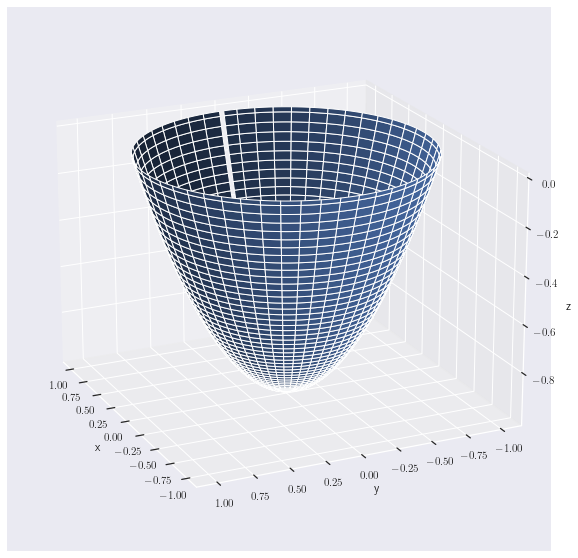

In [8]:
# generate body profile plots for phd paper

angles = (20, 155)

pressure = sln.pressure

fig = plt.figure()
ax = plt.axes(projection="3d")
q = 1

# generate mesh grid 
r = (np.arange(1,I+1)/I).reshape(-1,1)
a = (np.arange(1,J+1)*2*np.pi/J).reshape(-1,1)
x = np.multiply(r,np.cos(a).transpose())
y = np.multiply(q*r, np.sin(a).transpose())

N = 2
z = x**2 + y**2 -1
#dz/dx = 2x
#(-1*np.cos(1/100*np.pi*x)*np.cos(1/100*np.pi*y/q) + 0.5)*2
#dz/dx = pi/100*sin(pi*x/100)*cos(pi/100*y/q)
#np.cos(1*np.pi*y/q)*np.cos(1/2*np.pi*x) 
# z= np.cos(np.pi*x/N)*np.cos(1*np.pi*y*N/q)
# dz/dx = -pi/N* sin(pi*x/N) * cos(pi*y*N/q)

#dz/dx = pi* sin(pi*x)* cos(pi*y/(2q))

#np.cos(1*np.pi*y/q)*np.cos(1/2*np.pi*x) 
#dz/dx = -pi/10* sin(pi*x/10)*cos(pi*y/(10q))

ax.plot_surface(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(*angles)

#plt.savefig('3D_{}_f.pdf'.format(1),bbox_inches='tight')

In [ ]:
angles = (10, 145)

pressure = sln.pressure

fig = plt.figure()
ax = plt.axes(projection="3d")
q = 1

# generate mesh grid 
r = (np.arange(1,I+1)/I).reshape(-1,1)
a = (np.arange(1,J+1)*2*np.pi/J).reshape(-1,1)
x = np.multiply(r,np.cos(a).transpose())
y = np.multiply(q*r, np.sin(a).transpose())

N = 2
#z = -x
z = np.cos(np.pi*x/N)*np.cos(1*np.pi*y/q) 
# dz/dx = -pi/N* sin(pi*x/N) * cos(pi*y*N/q)

#dz/dx = pi* sin(pi*x)* cos(pi*y/(2q))

#np.cos(1*np.pi*y/q)*np.cos(1/2*np.pi*x) 
#dz/dx = -pi/10* sin(pi*x/10)*cos(pi*y/(10q))

ax.plot_surface(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(*angles)

#plt.savefig('3D_{}_f.pdf'.format(4),bbox_inches='tight')

In [25]:
save_fig = True
version=30

In [ ]:
z = pressure.values.reshape(I,-1)
test = pd.DataFrame(z)


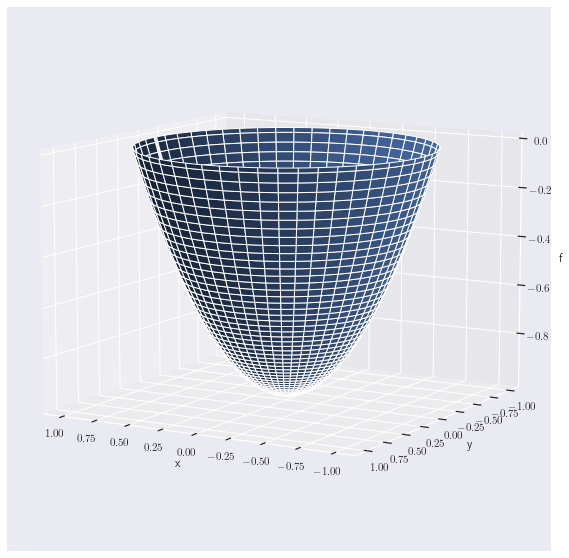

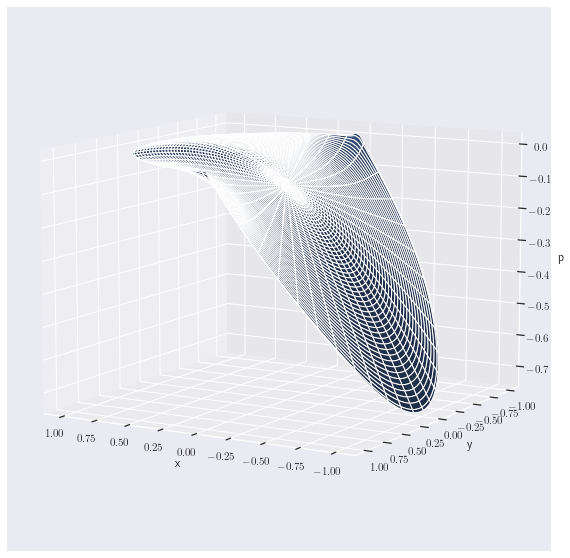

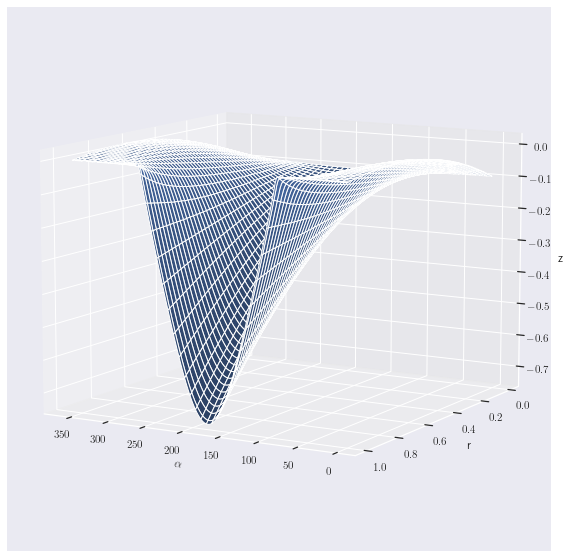

In [26]:
angles = (10, 120)

pressure = sln.pressure

fig = plt.figure()
ax = plt.axes(projection="3d")
q = 1

# generate mesh grid 
r = (np.arange(1,I+1)/I).reshape(-1,1)
a = (np.arange(1,J+1)*2*np.pi/J).reshape(-1,1)
x = np.multiply(r,np.cos(a).transpose())
y = np.multiply(q*r, np.sin(a).transpose())

N = 2
#z = -x
z = x**2 + (y/q)**2 - 1 + x*(0)
#np.cos(0.25*np.pi*x)*np.cos(0.5*np.pi*y/q)
# dz/dx = 
#dz/dx = -0.25*pi*sin(0.25*pi*x)*cos(1.5*pi*y/q)

#-np.cos(1*np.pi*x)*np.cos(1/2*np.pi*y/q)
#np.cos(1*np.pi*x)*np.cos(1/2*np.pi*y/q)
#np.cos(1/2*np.pi*x)*np.cos(1*np.pi*y/q)
#np.cos(1/2*np.pi*x)*np.cos(3*np.pi*y/q)
#np.cos(1/2*np.pi*x)*np.cos(1*np.pi*y/q)
#dz/dx = -pi/2 * sin(pi/2*x) * cos*(pi*y/q)

#np.cos(2*np.pi*x/N)*np.cos(2*np.pi*y*N/q)
#np.cos(0.5*np.pi*x)*np.cos(4*np.pi*y/q)

ax.plot_surface(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.view_init(*angles)
#plt.title(r'Plot of $f = \cos(\pi x / 2) \cos(\pi y / q)$, $q = {}$'.format(q))
if save_fig: 
    plt.savefig('comp_3D_{}_f.pdf'.format(version),bbox_inches='tight')
plt.show()


fig = plt.figure()
ax = plt.axes(projection="3d")
z = pressure.values.reshape(I,-1)

ax.plot_surface(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('p')
ax.view_init(*angles)
#plt.title(r'Pressure $p$, $q = {}$'.format(q))
plt.savefig('comp_3D_{}_p.pdf'.format(version),bbox_inches='tight')
if save_fig:
    plt.savefig('comp_3D_{}_p.pdf'.format(version),bbox_inches='tight')
plt.show() 


fig = plt.figure()
ax = plt.axes(projection="3d")

alpha = np.arange(1,J+1)*360/J
r = np.arange(1,I+1)/I
alpha, r = np.meshgrid(alpha, r)

ax.plot_surface(alpha,r,z)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('r')
ax.set_zlabel('z')

ax.view_init(*angles)
plt.show()

In [8]:
sns.set(rc={'figure.figsize':(14,10)})

In [13]:
from matplotlib.colors import ListedColormap

In [23]:
sln.vel_u.loc[:,90:110].describe()

,90,91,92,93,94,95,96,97,98,99,...,101,102,103,104,105,106,107,108,109,110
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.089753,0.086999,0.084542,0.082394,0.080563,0.079054,0.077875,0.077030,0.076521,0.076351,...,0.077029,0.077875,0.079054,0.080562,0.082393,0.084541,0.086997,0.089752,0.092795,0.096114
std,0.240946,0.243267,0.245339,0.247152,0.248700,0.249975,0.250972,0.251687,0.252117,0.252261,...,0.251688,0.250972,0.249976,0.248701,0.247153,0.245340,0.243268,0.240947,0.238385,0.235593
min,-0.418490,-0.426343,-0.433350,-0.439480,-0.444711,-0.449019,-0.452389,-0.454806,-0.456260,-0.456745,...,-0.454806,-0.452389,-0.449020,-0.444712,-0.439482,-0.433351,-0.426346,-0.418492,-0.409824,-0.400375
25%,-0.096817,-0.101307,-0.105311,-0.108814,-0.111803,-0.114264,-0.116188,-0.117568,-0.118398,-0.118677,...,-0.117569,-0.116190,-0.114266,-0.111804,-0.108816,-0.105313,-0.101309,-0.096819,-0.091862,-0.086458
50%,0.143472,0.141338,0.139438,0.137775,0.136359,0.135192,0.134282,0.133630,0.133237,0.133106,...,0.133630,0.134283,0.135194,0.136359,0.137776,0.139437,0.141336,0.143470,0.145828,0.148403
75%,0.304712,0.304008,0.303382,0.302836,0.302372,0.301990,0.301692,0.301479,0.301350,0.301307,...,0.301478,0.301691,0.301989,0.302370,0.302834,0.303379,0.304005,0.304708,0.305489,0.306344
max,0.389667,0.389655,0.389647,0.389635,0.389628,0.389626,0.389625,0.389625,0.389627,0.389631,...,0.389647,0.389654,0.389663,0.389675,0.389684,0.389690,0.389700,0.389716,0.389733,0.389750


In [22]:
sln.vel_v.loc[:,90:110].describe()

,90,91,92,93,94,95,96,97,98,99,...,101,102,103,104,105,106,107,108,109,110
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.034610,0.031242,0.027709,0.024028,0.020220,0.016306,0.012306,0.008241,0.004133,0.000003,...,-0.008234,-0.012299,-0.016300,-0.020214,-0.024021,-0.027702,-0.031235,-0.034602,-0.037784,-0.040763
std,0.038327,0.034492,0.030509,0.026397,0.022171,0.017851,0.013455,0.009001,0.004509,0.000012,...,0.009005,0.013459,0.017855,0.022175,0.026402,0.030515,0.034498,0.038332,0.042003,0.045493
min,-0.003436,-0.003038,-0.002643,-0.002254,-0.001870,-0.001489,-0.001112,-0.000737,-0.000364,-0.000107,...,-0.028614,-0.042763,-0.056725,-0.070436,-0.083836,-0.096866,-0.109467,-0.121583,-0.133160,-0.144144
25%,-0.000450,-0.000333,-0.000238,-0.000158,-0.000093,-0.000049,-0.000021,-0.000005,0.000003,0.000002,...,-0.014833,-0.022161,-0.029379,-0.036454,-0.043349,-0.050030,-0.056464,-0.062617,-0.068458,-0.073958
50%,0.021371,0.019367,0.017234,0.014987,0.012640,0.010212,0.007719,0.005176,0.002598,0.000004,...,-0.005168,-0.007713,-0.010208,-0.012635,-0.014980,-0.017228,-0.019361,-0.021365,-0.023227,-0.024930
75%,0.062618,0.056465,0.050032,0.043351,0.036456,0.029381,0.022163,0.014838,0.007438,0.000006,...,-0.000001,0.000022,0.000049,0.000088,0.000149,0.000232,0.000330,0.000448,0.000593,0.000707
max,0.121582,0.109466,0.096865,0.083835,0.070435,0.056724,0.042763,0.028614,0.014339,0.000013,...,0.000755,0.001131,0.001509,0.001890,0.002274,0.002663,0.003056,0.003456,0.003861,0.004274


/var/folders/vj/r7w62j65703cldzhhsrcb7h00000gn/T/ipykernel_2169/2213607787.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


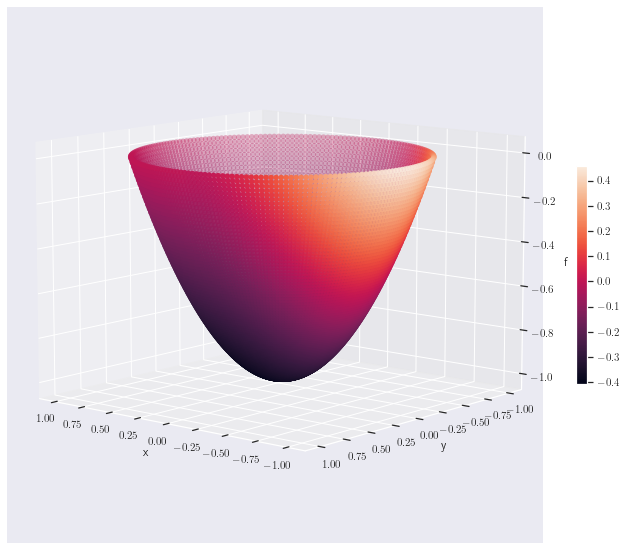

In [29]:
angles = (10, 130)

pressure = sln.pressure


fig = plt.figure()
#plt.axes().gca(projection='3d')
ax = fig.gca(projection='3d')
q = 1
ax.view_init(*angles)

# generate mesh grid 
r = (np.arange(1,I+1)/I).reshape(-1,1)
a = (np.arange(1,J+1)*2*np.pi/J).reshape(-1,1)
x = np.multiply(r,np.cos(a).transpose())
y = np.multiply(q*r, np.sin(a).transpose())

N = 2
f = x**2 + (y/q)**2 - 1 + x*(0)
#x**2 + (y/q)**2 - 1 + x*(0)
#np.cos(0.25*np.pi*x)*np.cos(0.5*np.pi*y/q) + x*(0.369302)
#np.cos(0.25*np.pi*x)*np.cos(0.5*np.pi*y/q) + x*(0.369302)
#x**2 + (y/q)**2 - 1 + x*(-1.5)
z = pressure.values.reshape(I,-1)
cmap = sns.color_palette("rocket", as_cmap=True)
surf = ax.scatter(x,y,f,c=z, depthshade=1, lw=0, s=30, cmap=cmap)


fig.colorbar(surf, shrink=0.4, aspect=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')


plt.savefig('comp_3D_{}_pf.pdf'.format(version),bbox_inches='tight')
plt.show()

In [ ]:


f = g(x)+ x*theta1 + y*theta2

In [ ]:
angles = (20, 130)

pressure = np.abs(sln.vel_v) + np.abs(sln.vel_u)
q = 10

fig = plt.figure()
ax = plt.axes(projection="3d")
z = pressure.values.reshape(I,-1)

ax.plot_surface(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('p')
ax.view_init(*angles)
#plt.title(r'Pressure $p$, $q = {}$'.format(q))
if save_fig:
    plt.savefig('comp_3D_{}_p.pdf'.format(version),bbox_inches='tight')
plt.show() 


fig = plt.figure()
ax = plt.axes(projection="3d")

alpha = np.arange(1,J+1)*360/J
r = np.arange(1,I+1)/I
alpha, r = np.meshgrid(alpha, r)

ax.plot_surface(alpha,r,z)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('r')
ax.set_zlabel('z')

ax.view_init(*angles)
plt.show()

x = np.arange(-1,1,0.01)
y = np.cos(0.5*x*np.pi)

#g(x) = -z*cos(2pi*x)

df = pd.DataFrame({'x':x,'y':y})
fig = plt.figure()
df.plot(x='x')
plt.title('g(x)')

In [ ]:
z = pressure.values.reshape(I,-1)

In [ ]:
z.shape

In [ ]:
plt.plot(x[10])

In [ ]:
nx = np.concatenate((x[::-1,-1], x[:,99]))

nz = np.concatenate((z[::-1,-1], z[:,99]))

plt.plot(nz)
plt.plot(1-nx)
plt.legend(['analytical','numerical'])

In [ ]:
y[:,99]

In [ ]:
y[:,-1]

In [ ]:
plt.plot(z[:,99])

In [ ]:
plt.plot(z[:,-1])

In [ ]:
plt.plot(z[0,:])

In [ ]:
i = 99
t = 50

labels = ['x_c = {}'.format(i) for i in [-1,0,1]]

fig = plt.figure()
for p in [slns[v].psi for v in range(len(slns))]:
    c_p = p.iloc[i]
    c_p.index = np.arange(1,J+1)*360/J
    ax = c_p.plot()
    #pp = pd.DataFrame({'Pressure':p.iloc[i], 'alpha':np.arange(1,J+1)*360/J})
    #ax = pp.plot(x='alpha')
ax.legend(labels)
plt.title('Pressure at r={0}*dr, t={1}*dt'.format(i+1, t))

fig = plt.figure()
for h in [slns[v].h[:t] for v in range(len(slns))]:
    ax = h.iloc[:,0].plot()
ax.legend(labels)
plt.title('h at t={}*dt'.format(t))

fig = plt.figure()
for theta in [slns[v].theta_A[:t] for v in range(len(slns))]:
    ax = theta.iloc[:,0].plot()
ax.legend(labels)
plt.title('theta1 at t={}*dt'.format(t))

fig = plt.figure()
for theta in [slns[v].theta_B[:t] for v in range(len(slns))]:
    ax = theta.iloc[:,0].plot()
ax.legend(labels)
plt.title('theta2 at t={}*dt'.format(t))


## plot slns

In [ ]:
def df_dx(idx, J, dr, da, theta1, theta2):
    alpha = np.arange(da, 2*np.pi+da, da)
    r = (idx+1)*dr;

    df_dr = np.cos(alpha)*theta1 + np.sin(alpha)*theta2;
    df_da = r*(np.cos(alpha)*theta2 - np.sin(alpha)*theta1);
    
    res = df_dr*np.cos(alpha)-df_da*np.sin(alpha)/r 
        #-3*(np.sin(alpha) + np.cos(alpha))
        #df_dr*np.cos(alpha)-df_da*np.sin(alpha)/r 
    return res


def check_sln(psi, idx, J, dr, da, theta1, theta2, rhs_func):
    c_psi = psi.iloc[idx]
    r = (idx+1)*dr
    alpha = np.arange(da, 2*np.pi+da, da)

    psi_2 = c_psi.values
    s1_psi_2 = c_psi.shift(1).fillna(c_psi.values[-1]).values
    s2_psi_2 = c_psi.shift(-1).fillna(c_psi.values[0]).values
    
    psi_1 = psi.iloc[idx-1].values
    psi_3 = psi.iloc[idx+1].values
    
    d2psi_dr2 = (psi_3+psi_1-2*psi_2)/(dr**2)
    dpsi_dr = (psi_3 - psi_1)/(2*dr)
    d2psi_da2 = (s1_psi_2+s2_psi_2-2*psi_2)/(da**2)
    
    num_soln = d2psi_dr2 + dpsi_dr/r + d2psi_da2/np.power(r,2)
    real_soln = -rhs_func(idx, J, dr, da, theta1, theta2)

    return num_soln, real_soln

In [ ]:
num, rel = check_sln(psi, 2, J, dr, da, -1, 0, df_dx)
pd.DataFrame({'num':num}).plot()

In [ ]:
pressure = pressures[2]
fig = plt.figure()
ax = plt.axes(projection="3d")

alpha = np.arange(1,J+1)*360/J
r = np.arange(1,I+1)/I
alpha, r = np.meshgrid(alpha, r)

z = pressure.values.reshape(I,-1)

ax.plot_surface(alpha,r,z)
ax.set_xlabel('α')
ax.set_ylabel('r')
ax.set_zlabel('z')

ax.view_init(20, 75)

plt.show()

In [ ]:
hs[2].plot()

# circle numerics

In [ ]:
pressure.iloc[99].plot()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")

alpha = np.arange(1,J+1)*360/J
r = np.arange(1,I+1)/I
alpha, r = np.meshgrid(alpha, r)

z = pressure.values.reshape(I,-1)

ax.plot_surface(alpha,r,z)
ax.set_xlabel('α')
ax.set_ylabel('r')
ax.set_zlabel('z')

ax.view_init(20, 75)

plt.show()

In [ ]:
h.plot()

In [ ]:
theta1.plot()

## test solution

In [ ]:
num, rel = check_sln(psi, 1, J, dr, da, 1, 0, df_dx)
pd.DataFrame({'num':num,'rel':rel}).plot()
pd.Series(num-rel).describe()

In [ ]:
num, rel = check_sln(psi, 98, J, dr, da, 1, 0, df_dx)
pd.DataFrame({'num':num,'rel':rel}).plot()
pd.Series(num-rel).describe()

In [ ]:
i = 98
r = (i+1)*dr
alphas = (np.arange(J)+1)*2*np.pi/J
real_sln = r**2*(np.sin(alphas) + np.cos(alphas))

In [ ]:
pd.DataFrame({'real': real_sln,'num':psi.iloc[i]}).plot()

In [ ]:
pd.Series(real_sln - psi.iloc[i]).plot()

## v1

In [ ]:
i = I
plot_ids = [i] #1*d_r, 100*d_r = R = 1
for j in plot_ids:
    c_psi = get_psi(psi, j)
    ax = plot_psi(c_psi) 
ax.legend(plot_ids)

ans = pd.DataFrame({'α':np.arange(len(c_psi))*360/J, 
                    'Ψ':[np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]})
ans.plot(x='α',y='Ψ', ax = ax)
ax.legend(['soln r={}*dr'.format(i),'actual r={}*dr'.format(i)])

errs.describe()

In [ ]:
j=2000
i = I
plot_ids = [i] #1*d_r, 100*d_r = R = 1
for j in plot_ids:
    c_psi = get_psi(psi, j)
    ax = plot_psi(c_psi) 
ax.legend(plot_ids)

ans = pd.DataFrame({'α':np.arange(len(c_psi))*360/J, 
                    'Ψ':[np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]})
ans.plot(x='α',y='Ψ', ax = ax)
ax.legend(['soln r={}*dr'.format(i),'actual r={}*dr'.format(i)])

errs.describe()

In [ ]:
i = I
plot_ids = [i] #1*d_r, 100*d_r = R = 1
for j in plot_ids:
    c_psi = get_psi(psi, j)
    ax = plot_psi(c_psi) 
ax.legend(plot_ids)

ans = pd.DataFrame({'α':np.arange(len(c_psi))*360/J, 
                    'Ψ':[np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]})
ans.plot(x='α',y='Ψ', ax = ax)
ax.legend(['soln r={}*dr'.format(i),'actual r={}*dr'.format(i)])

errs.describe()

In [ ]:
j=2000
i= I
plot_ids = [i] #1*d_r, 100*d_r = R = 1
for j in plot_ids:
    c_psi = get_psi(psi, j)
    ax = plot_psi(c_psi) 
ax.legend(plot_ids)

ans = pd.DataFrame({'α':np.arange(len(c_psi))*360/J, 
                    'Ψ':[np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]})
ans.plot(x='α',y='Ψ', ax = ax)
ax.legend(['soln r={}*dr'.format(i),'actual r={}*dr'.format(i)])

errs.describe()

In [ ]:
i = 1000
plot_ids = [i] #1*d_r, 100*d_r = R = 1
for j in plot_ids:
    c_psi = get_psi(psi, j)
    ax = plot_psi(c_psi) 
ax.legend(plot_ids)

ans = pd.DataFrame({'α':np.arange(len(c_psi))*360/J, 
                    'Ψ':[np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]})
ans.plot(x='α',y='Ψ', ax = ax)
ax.legend(['soln r={}*dr'.format(i),'actual r={}*dr'.format(i)])

errs.describe()

In [ ]:
i = 1000
j = 2000
plot_ids = [i] #1*d_r, 100*d_r = R = 1
for j in plot_ids:
    c_psi = get_psi(psi, j)
    ax = plot_psi(c_psi) 
ax.legend(plot_ids)

ans = pd.DataFrame({'α':np.arange(len(c_psi))*360/J, 
                    'Ψ':[np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]})
ans.plot(x='α',y='Ψ', ax = ax)
ax.legend(['soln r={}*dr'.format(i),'actual r={}*dr'.format(i)])

errs.describe()

i = 1
plot_ids = [i] #1*d_r, 100*d_r = R = 1
for j in plot_ids:
    c_psi = get_psi(psi, j)
    ax = plot_psi(c_psi) 
ax.legend(plot_ids)

ans = pd.DataFrame({'x':np.arange(len(c_psi))*360/J, 
                    'psi':[np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]})
ans.plot(x='x',y='psi', ax = ax)
ax.legend(['soln','actual'])

In [ ]:
np.power(2*0.1, -2)

## plot errors

In [ ]:
ax = errs.plot()

ax.set_title('Mean absolute error (numerical v.s. actual) for r in R')

In [ ]:
ax = errs.plot()

ax.set_title('Mean absolute error (numerical v.s. actual) for r in [1 ... 99]*dr')

# 4th order accuracy

In [ ]:
errs.describe()

In [ ]:
ax = errs.plot()

ax.set_title('Mean absolute error (numerical v.s. actual) for r in [1 ... 99]*dr')

pd.Series ([np.power((i*dr),2)*(np.sin(x*da) + np.cos(x*da)) for x in range(1,J+1)]).plot()

In [ ]:
import json
import yfinance as yf
from datetime import datetime

dt = datetime.now()

datetime.strftime(dt, '%Y-%m-%d')

data = yf.download("BTC-USD", start="2020-01-01", end="2021-04-30")

data.reset_index()